#### Importer les bibliothéque

In [43]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense , Conv2D 
from tensorflow.keras.optimizers import Adam

#### Importer le dataset

In [4]:
df_employer = pd.read_csv("D:\Projet_DeepLearning\PMC\Data\employee_performance.csv")
df_employer.head()

,Age,Education Level,Years of Experience,Industry,Role,Hours Worked per Week,Job Satisfaction,Number of Projects Completed,Performance
0,56,4,23,1,1,40,3,3,0
1,46,4,16,3,6,56,1,1,0
2,32,4,0,2,5,50,1,5,0
3,60,3,41,5,8,42,2,13,0
4,25,3,14,3,8,48,3,17,0


#### Analyser le dataset

In [5]:
print("ligne_clonne : " , df_employer.shape , "taille : ", df_employer.size , "dimension :" ,  df_employer.ndim )

ligne_clonne :  (100000, 9) taille :  900000 dimension : 2


In [6]:
df_employer.dtypes

Age                             int64
Education Level                 int64
Years of Experience             int64
Industry                        int64
Role                            int64
Hours Worked per Week           int64
Job Satisfaction                int64
Number of Projects Completed    int64
Performance                     int64
dtype: object

In [7]:
df_employer.columns.tolist()

['Age',
 'Education Level',
 'Years of Experience',
 'Industry',
 'Role',
 'Hours Worked per Week',
 'Job Satisfaction',
 'Number of Projects Completed',
 'Performance']

In [8]:
df_employer.isnull().sum()

Age                             0
Education Level                 0
Years of Experience             0
Industry                        0
Role                            0
Hours Worked per Week           0
Job Satisfaction                0
Number of Projects Completed    0
Performance                     0
dtype: int64

In [9]:
df_employer.describe()

,Age,Education Level,Years of Experience,Industry,Role,Hours Worked per Week,Job Satisfaction,Number of Projects Completed,Performance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.022480,2.496440,23.070250,2.994450,4.995330,42.027200,3.000990,9.464530,0.106860
std,13.526548,1.118517,13.568219,1.414588,2.573728,12.968837,1.411952,5.761442,0.308937
min,18.000000,1.000000,0.000000,1.000000,1.000000,20.000000,1.000000,0.000000,0.000000
25%,29.000000,1.000000,11.000000,2.000000,3.000000,31.000000,2.000000,4.000000,0.000000
50%,41.000000,2.000000,23.000000,3.000000,5.000000,42.000000,3.000000,9.000000,0.000000
75%,53.000000,3.000000,35.000000,4.000000,7.000000,53.000000,4.000000,14.000000,0.000000
max,64.000000,4.000000,46.000000,5.000000,9.000000,64.000000,5.000000,19.000000,1.000000


#### analyser graphiquement 

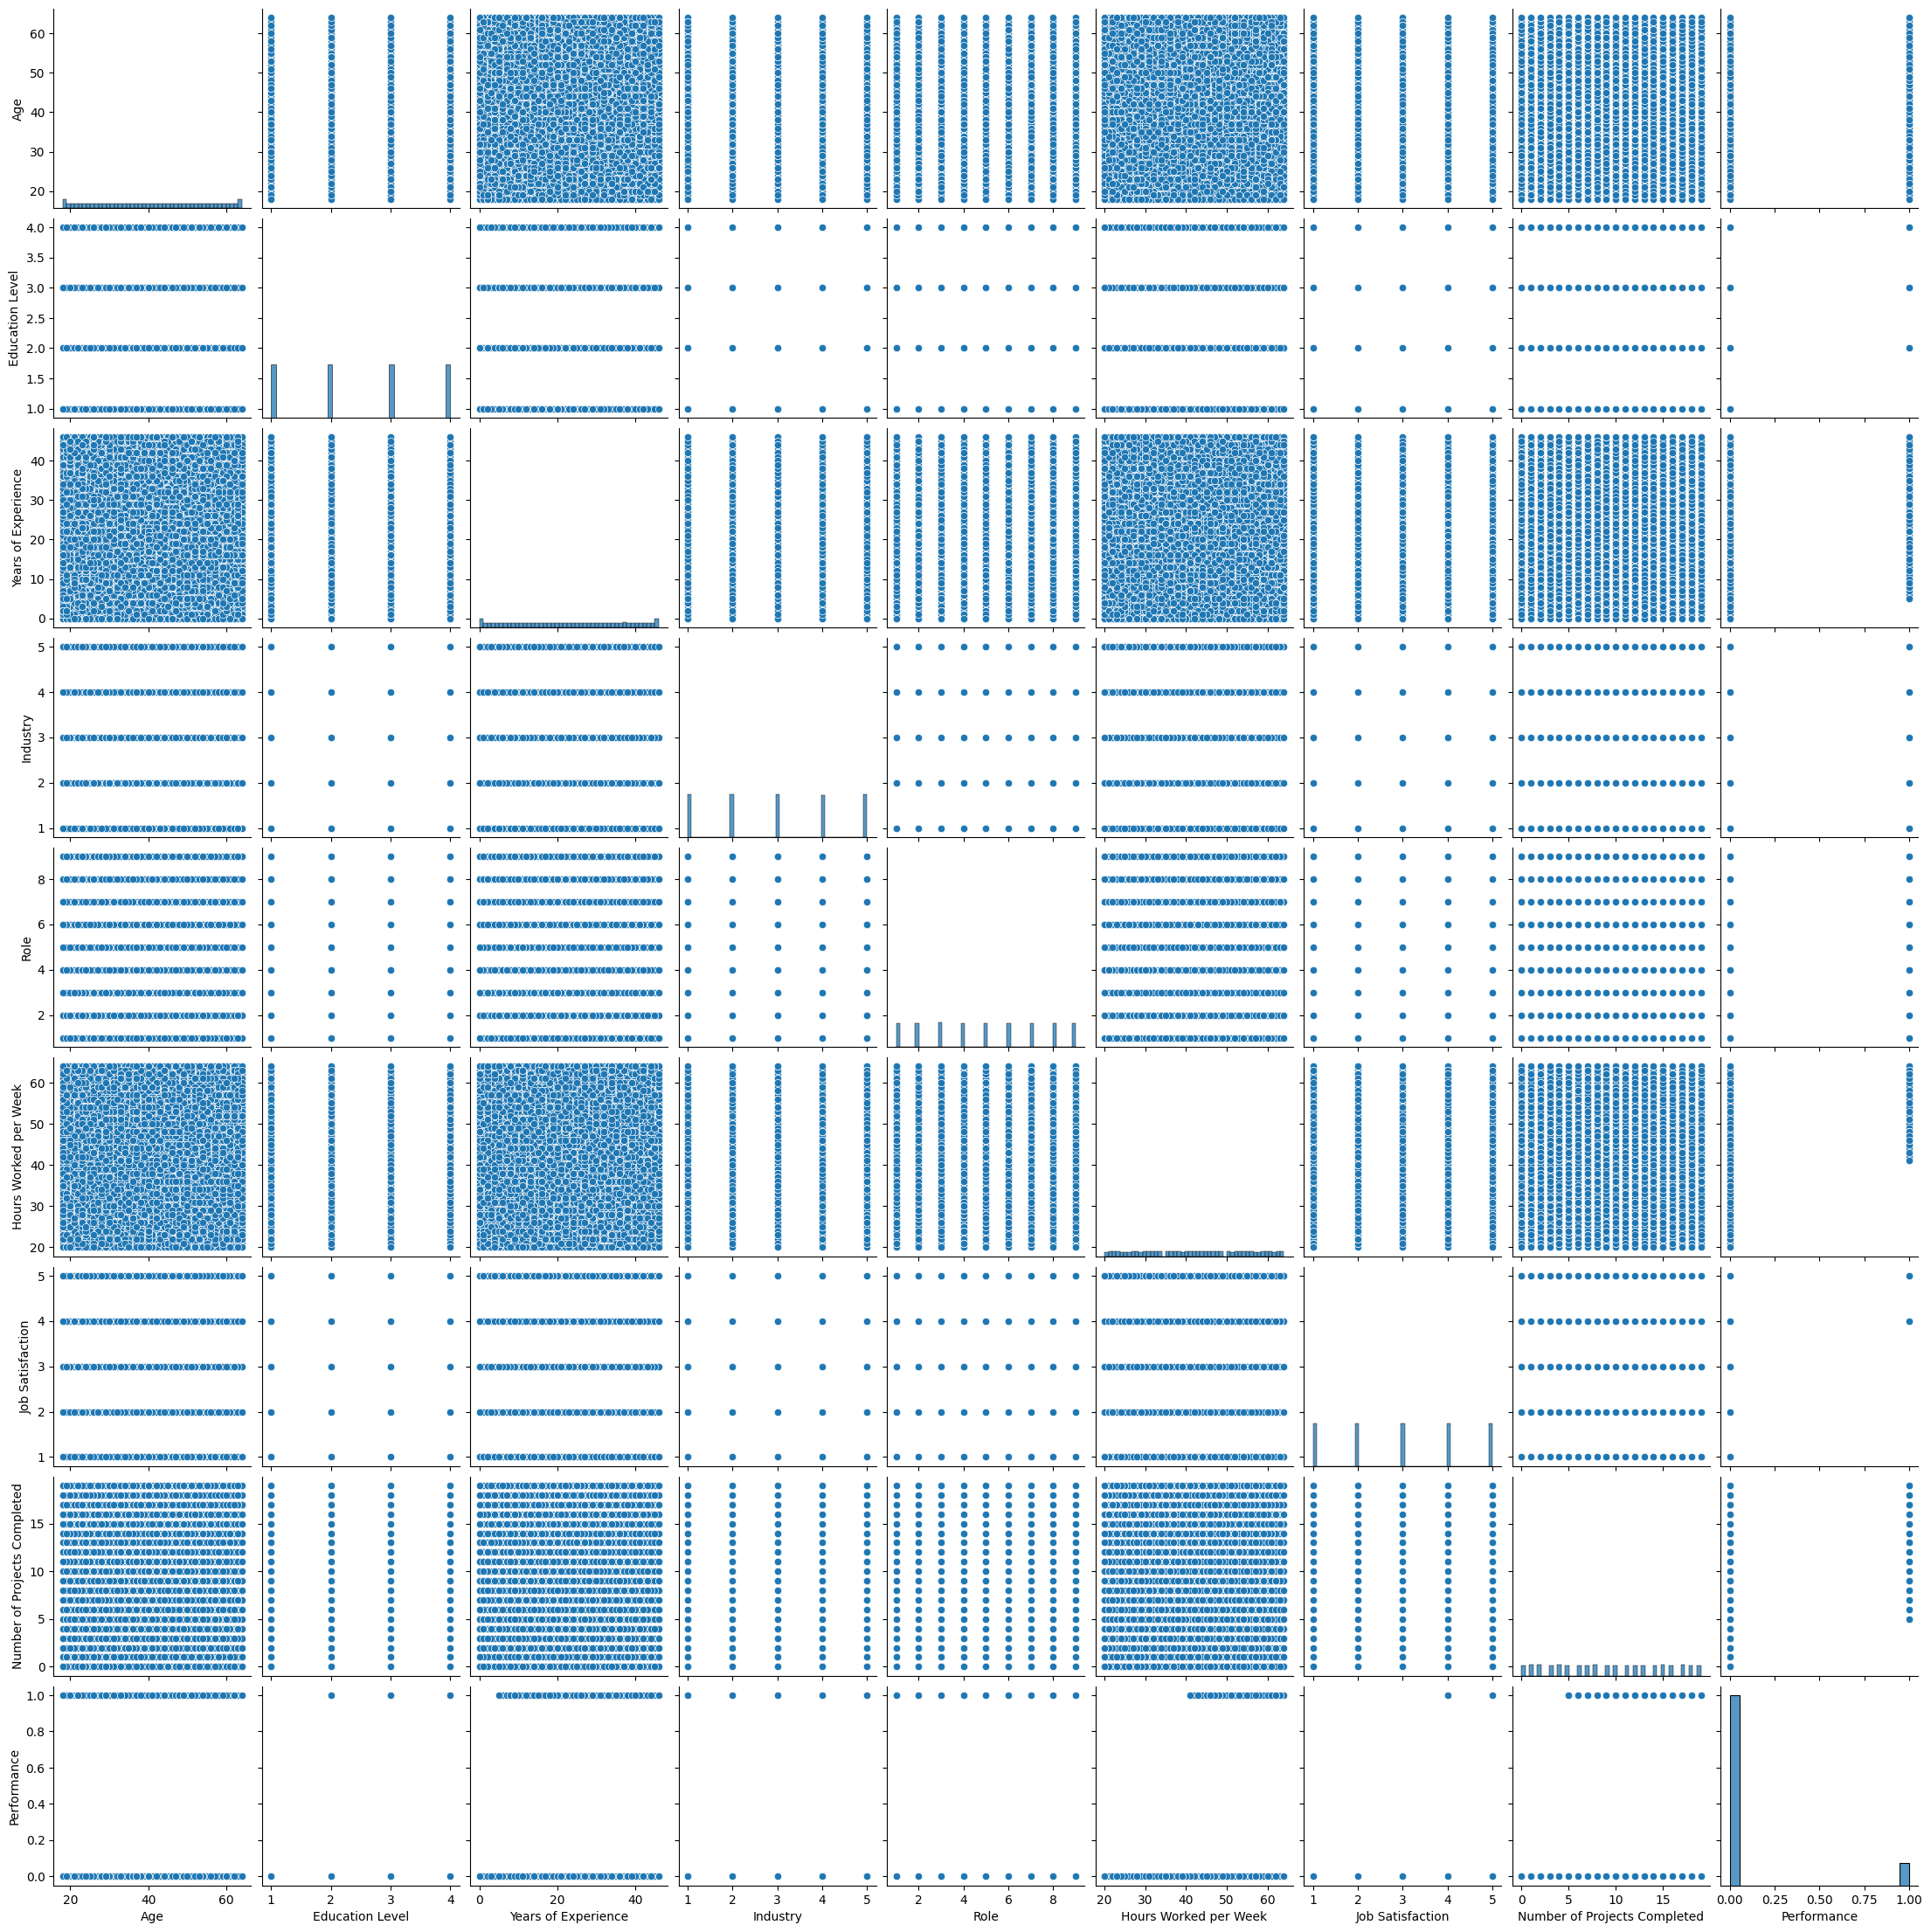

In [10]:
sns.pairplot(df_employer)

In [29]:
value = df_employer["Performance"].value_counts()

value

Performance
0    89314
1    10686
Name: count, dtype: int64

<BarContainer object of 2 artists>

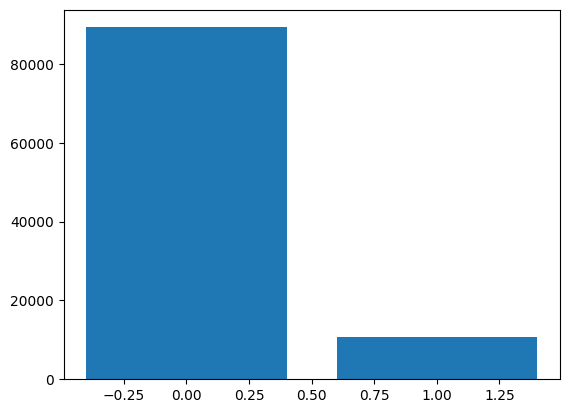

In [69]:
plt.bar(value.index , value)

#### Utlisation du PMC

In [70]:
### diviser le dataset
y = df_employer["Performance"]
x = df_employer.drop("Performance" ,axis=1)

x_train , x_test , y_train , y_test = train_test_split(x, y , test_size =0.2 , random_state=40)

print(x_train.shape)
print(y_train.shape)

(80000, 8)
(80000,)


In [41]:
### normaliser le daatset 
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [ ]:
##Creer un model 
model = Sequential([
    Dense(8 , input_shape = (8,) ),
    Dense(64 , activation = "relu"),
    Dense(32 , activation = "relu"),
    Dense(1 , activation = "sigmoid")
])

In [51]:
### Compilation du modle 
model.compile(optimizer=Adam(learning_rate=0.001),   loss="binary_crossentropy" , metrics=["accuracy"])

In [78]:
### Entrainement du model 
history = model.fit(x_train_scaler , y_train , epochs=10)

Epoch 1/10
2500/2500 [==============================] - 7s 3ms/step - loss: 0.0025 - accuracy: 0.9992
Epoch 2/10
2500/2500 [==============================] - 6s 3ms/step - loss: 0.0020 - accuracy: 0.9992
Epoch 3/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0032 - accuracy: 0.9991
Epoch 4/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0023 - accuracy: 0.9994
Epoch 5/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0029 - accuracy: 0.9991
Epoch 6/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0022 - accuracy: 0.9994
Epoch 7/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0022 - accuracy: 0.9993
Epoch 8/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0022 - accuracy: 0.9994
Epoch 9/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0018 - accuracy: 0.9992
Epoch 10/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.002

In [75]:
## Evaluer le model 
loss_test , accuracy_test  = model.evaluate(x_test_scaler, y_test)

625/625 [==============================] - 1s 2ms/step - loss: 0.0045 - accuracy: 0.9984


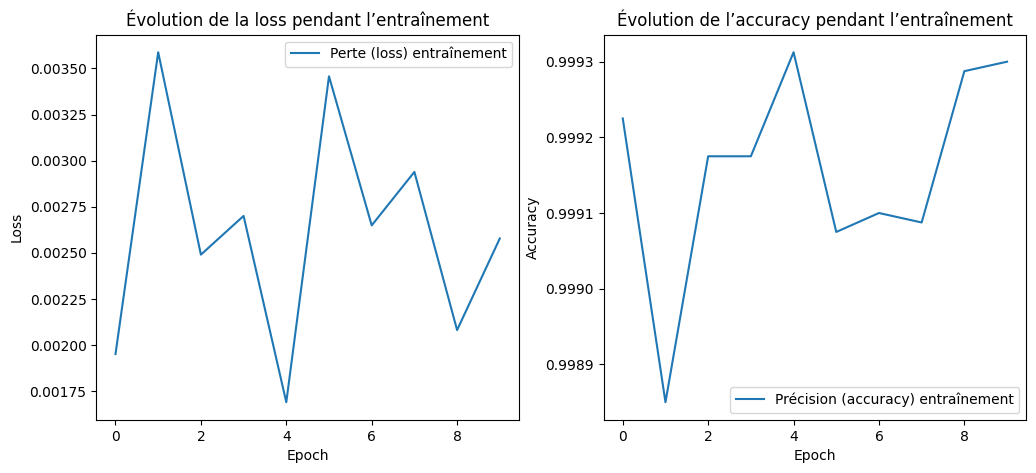

In [76]:
# Courbe de la loss
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Perte (loss) entraînement')
plt.title('Évolution de la loss pendant l’entraînement')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Courbe de l’accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Précision (accuracy) entraînement')
plt.title('Évolution de l’accuracy pendant l’entraînement')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
